In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import datetime
datetime.datetime.strptime

<function datetime.strptime>

In [103]:
rat = "Rat_Sightings.csv"
rat_df = pd.read_csv(rat)
print(rat_df.shape)
print(rat_df.head())

(122661, 38)
   Unique Key            Created Date Closed Date Agency  \
0    15633054  01/01/2010 11:20:45 AM         NaN  DOHMH   
1    15633304  01/02/2010 12:50:36 AM         NaN  DOHMH   
2    15633594  01/01/2010 03:05:37 PM         NaN  DOHMH   
3    15633599  01/01/2010 08:52:19 PM         NaN  DOHMH   
4    15633605  01/01/2010 04:14:27 PM         NaN  DOHMH   

                               Agency Name Complaint Type    Descriptor  \
0  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
1  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
2  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
3  Department of Health and Mental Hygiene         Rodent  Rat Sighting   
4  Department of Health and Mental Hygiene         Rodent  Rat Sighting   

             Location Type  Incident Zip      Incident Address  \
0      1-2 Family Dwelling       11365.0      59-13 159 STREET   
1      Commercial Building       10016.0   

/Users/christopherlowenkamp/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [104]:
clean_df = rat_df [["Created Date", "Closed Date", "Location Type","Borough","Latitude", "Longitude"]]
clean_df.head()

,Created Date,Closed Date,Location Type,Borough,Latitude,Longitude
0,01/01/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,40.739983,-73.809299
1,01/02/2010 12:50:36 AM,NaN,Commercial Building,MANHATTAN,40.743161,-73.976983
2,01/01/2010 03:05:37 PM,NaN,3+ Family Apt. Building,QUEENS,40.756987,-73.903618
3,01/01/2010 08:52:19 PM,NaN,Other (Explain Below),BROOKLYN,40.688903,-73.980929
4,01/01/2010 04:14:27 PM,NaN,3+ Family Apt. Building,BRONX,40.863614,-73.870441


In [105]:
clean_df['converted_date'] = pd.to_datetime(clean_df['Created Date'],infer_datetime_format=True)
print(converted_date['month'].value_counts())
print(converted_date['year'].value_counts())
clean_df.drop(clean_df[clean_df.Borough=='Unspecified'].index, inplace=True)

/Users/christopherlowenkamp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


7     11982
8     11656
6     11307
5     10778
9     10532
10     9662
4      8897
3      7736
11     6618
2      5904
12     5832
1      5736
Name: Created Date, dtype: int64
2017    19152
2016    17230
2015    15272
2014    12617
2013    10739
2012    10642
2010    10534
2011    10454
Name: Created Date, dtype: int64


/Users/christopherlowenkamp/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [106]:
clean_df[(clean_df['converted_date'] < '2018-01-01') ]

,Created Date,Closed Date,Location Type,Borough,Latitude,Longitude,converted_date
0,01/01/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,40.739983,-73.809299,2010-01-01 11:20:45
1,01/02/2010 12:50:36 AM,NaN,Commercial Building,MANHATTAN,40.743161,-73.976983,2010-01-02 00:50:36
2,01/01/2010 03:05:37 PM,NaN,3+ Family Apt. Building,QUEENS,40.756987,-73.903618,2010-01-01 15:05:37
3,01/01/2010 08:52:19 PM,NaN,Other (Explain Below),BROOKLYN,40.688903,-73.980929,2010-01-01 20:52:19
4,01/01/2010 04:14:27 PM,NaN,3+ Family Apt. Building,BRONX,40.863614,-73.870441,2010-01-01 16:14:27
5,01/01/2010 08:29:58 AM,NaN,3+ Family Apt. Building,BROOKLYN,40.692989,-73.943771,2010-01-01 08:29:58
6,01/01/2010 02:15:27 PM,NaN,Vacant Building,BROOKLYN,40.635654,-73.967757,2010-01-01 14:15:27
7,01/01/2010 12:11:51 PM,NaN,3+ Family Apt. Building,MANHATTAN,40.807367,-73.954388,2010-01-01 12:11:51
8,01/01/2010 12:12:04 PM,NaN,3+ Family Apt. Building,BRONX,40.855513,-73.890006,2010-01-01 12:12:04
9,01/01/2010 11:46:51 PM,NaN,Commercial Building,BROOKLYN,40.689131,-73.981534,2010-01-01 23:46:51


In [108]:
clean_df['converted_date'] = pd.to_datetime(clean_df['Created Date'],infer_datetime_format=True)
clean_df.head()


/Users/christopherlowenkamp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Created Date,Closed Date,Location Type,Borough,Latitude,Longitude,converted_date
0,01/01/2010 11:20:45 AM,NaN,1-2 Family Dwelling,QUEENS,40.739983,-73.809299,2010-01-01 11:20:45
1,01/02/2010 12:50:36 AM,NaN,Commercial Building,MANHATTAN,40.743161,-73.976983,2010-01-02 00:50:36
2,01/01/2010 03:05:37 PM,NaN,3+ Family Apt. Building,QUEENS,40.756987,-73.903618,2010-01-01 15:05:37
3,01/01/2010 08:52:19 PM,NaN,Other (Explain Below),BROOKLYN,40.688903,-73.980929,2010-01-01 20:52:19
4,01/01/2010 04:14:27 PM,NaN,3+ Family Apt. Building,BRONX,40.863614,-73.870441,2010-01-01 16:14:27


In [109]:
clean_df.dtypes

Created Date              object
Closed Date               object
Location Type             object
Borough                   object
Latitude                 float64
Longitude                float64
converted_date    datetime64[ns]
dtype: object

In [110]:
clean_df['Borough'].value_counts()

BROOKLYN         42515
MANHATTAN        31917
BRONX            24561
QUEENS           17857
STATEN ISLAND     5792
Name: Borough, dtype: int64

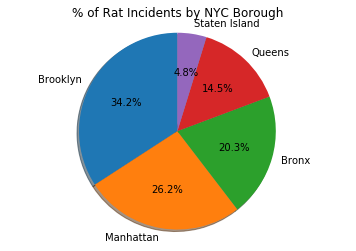

In [74]:
labels = ["Brooklyn", "Manhattan", "Bronx",'Queens', 'Staten Island']
sizes = clean_df['Borough'].value_counts()
explode = (0, .6, 0)
plt.pie(sizes,labels=labels,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("% of Rat Incidents by NYC Borough")
plt.axis("equal")
plt.show()

In [162]:
seasons = ['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer', 'Summer', 'Fall', 'Fall', 'Fall', 'Winter']
month_to_season = dict(zip(range(1,13), seasons))

In [163]:
month_to_season

{1: 'Winter',
 2: 'Winter',
 3: 'Spring',
 4: 'Spring',
 5: 'Spring',
 6: 'Summer',
 7: 'Summer',
 8: 'Summer',
 9: 'Fall',
 10: 'Fall',
 11: 'Fall',
 12: 'Winter'}

In [164]:
clean_df['season'] = clean_df['month'].replace(month_to_season)

/Users/christopherlowenkamp/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [170]:
season = clean_df['season'].value_counts()

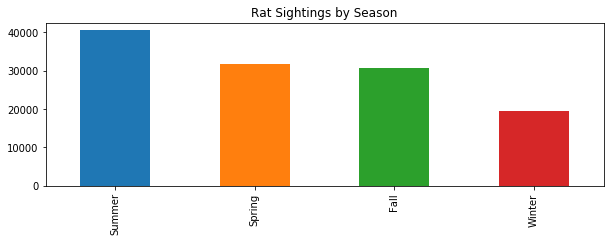

<Figure size 432x288 with 0 Axes>

In [171]:
season.plot(kind="bar", figsize=(10,3))
plt.title("Rat Sightings by Season")
plt.show()
plt.tight_layout()

In [172]:
month = clean_df['month'].value_counts()

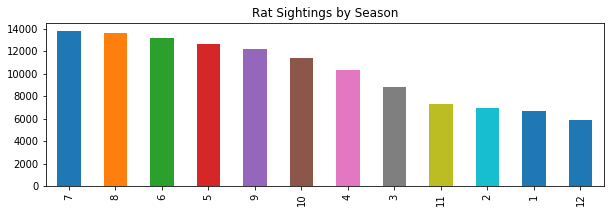

<Figure size 432x288 with 0 Axes>

In [173]:
month.plot(kind="bar", figsize=(10,3))
plt.title("Rat Sightings by Season")
plt.show()
plt.tight_layout()